# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [ ]:
import numpy as np
import pandas as pd
# bibliotecas utilizadas para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
#biblioteca para separação dos nossos dados em treino/teste e modelo de regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df_original = pd.read_csv("/content/dataR2.csv")
df_original.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Esse conjunto de dados são análises de sangue de rotina, com esses dados apresentado, será verificado quais as possiveis relações entre os componentes do exames e o cancer, e se é possivel diagnosticar precocemente, somente com esses dados. 
Este trabalho será feito uma regressão logistica, para predizer possiveis pacientes com cancer, baseando-se nos dados da analise sanguinea.

 Como este procedimento visa aumentar a facilidade de sinalização para o diagnóstico precoce do câncer de mama, pois pode ter um grande impacto na saúde de muitas mulheres.

Os dados apresentam: idade, IMC, glicose,insulina, resistencia a insulina, leptina (hormonio do tecido adiposo), Adiponectina (um hormônio associado com a obesidade e diabetes tipo 2, Resistina (proteina do tecido adiposo),proteina MCP-1 (pg/dL). Todos esses dados estão relacionados ao peso, gordura e açucares corporais, e será verificado a relação entre o cancer de mama e a resistencia a insulina (HOMA).

 Sera verificado quais as principais relações entre eles e os pacientes (com cancer). Neste trabalho, separei em dois grupos PACIENTES (com cancer) e CONTROLE (sem cancer). 

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

In [ ]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

df = df_original.copy()
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
#alterando o nome da coluna, por causa do ponto.
df = df.rename(columns={'MCP.1': 'MCP1'})
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP1            116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
#Limpandos dados nulos ou em branco
df = df.replace({'?': np.nan})
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP1            116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 10.0 KB


In [ ]:
#PRINCIPAIS VARIAVEIS CORRELACIONAM COM A CLASSIFICAÇÃO
df.corr()["Classification"].sort_values(ascending=False)

Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
MCP1              0.091381
Leptin           -0.001078
Adiponectin      -0.019490
Age              -0.043555
BMI              -0.132586
Name: Classification, dtype: float64

In [ ]:
#separando o grupo de pessoas com sobre peso e obesos
obesos = df.loc[((df.BMI >= 25))]
obesos.value_counts("Classification")

Classification
2    41
1    35
dtype: int64

In [ ]:
homa = df.loc[((df.HOMA < 175))]
homa.value_counts("Classification")

Classification
2    64
1    52
dtype: int64

In [ ]:
#separando os pacientes
positivo = df[df['Classification'].isin([2])]
negativo = df[df['Classification'].isin([1])]
positivo

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
glicose = df.loc[(df.Glucose > 100) & (df.Insulin > 10)]
glicose.value_counts("Classification")

Classification
2    15
1     3
dtype: int64

Abaixo, apresento o gráfico da relação do IMC em relação a Resistina, que é uma proteina do tecido adiposo. Quanto mais resistina e na faixa de pré-obesidade IMC, fazem parte do grupo de pacientes (com cancer).

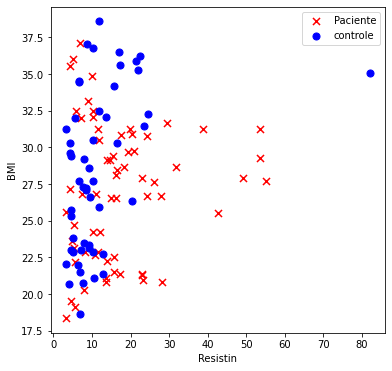

In [ ]:


fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['Resistin'], positivo['BMI'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['Resistin'], negativo['BMI'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('Resistin')
ax.set_ylabel('BMI');


Abaixo, um gráfico da relação entre a Insulina e a Resistência a insulina (HOMA). Podemos observar que as taxa de insulina e a resistência a insulina maiores são o grupo de pacientes (com cancer).

 A resistência à insulina mostrou-se um fator de risco importante ao desenvolvimento do cancêr de mama. 
 A hiperinsulinemia, especialmente, tem sido sugerida como um potencial mecanismo para gênese do câncer através da modulação da via do fator de  crescimento insulina símile (IGF).

 Fonte: https://www.arca.fiocruz.br/handle/icict/8037#:~:text=A%20resistência%20à%20insulina%20mostrou,tardio%20do%20câncer%20de%20mama.

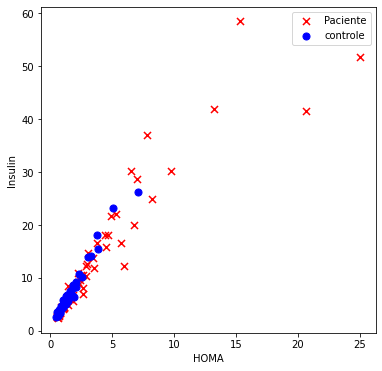

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['HOMA'], positivo['Insulin'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['HOMA'], negativo['Insulin'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('HOMA')
ax.set_ylabel('Insulin');

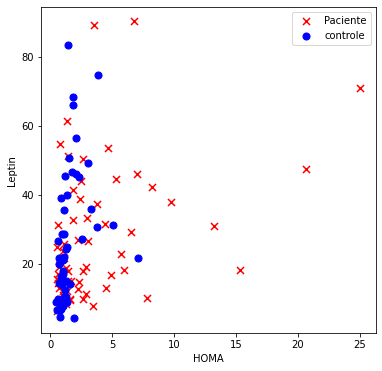

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['HOMA'], positivo['Leptin'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['HOMA'], negativo['Leptin'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('HOMA')
ax.set_ylabel('Leptin');

Abaixo a representação grafica da resistina e da insulina, aqui podemos verificar nitidademente que quanto maior a insulina e/ou maior resistina, fazem parte do grupo de pacientes.

Os níveis de resistina aumentam na obesidade genética ou induzida por dieta e, portanto, estão ligadas à resistência insulínica associada à obesidade. 

A resistina é uma proteína produzida pelos adipócitos e macrófagos que está associada ao desenvolvimento de resistência insulínica e tem sido demonstrado que esta proteina é um antagonista da insulina.

(Fonte: http://www.luzimarteixeira.com.br/adipocinas-obesidade-e-doencas-cronicas/)

Text(0, 0.5, 'Insulin')

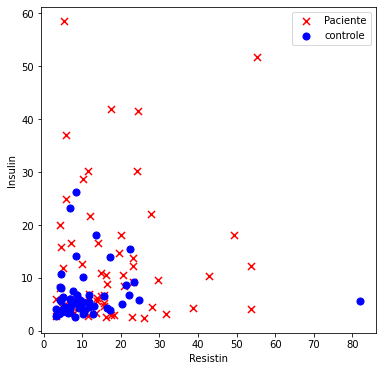

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['Resistin'], positivo['Insulin'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['Resistin'], negativo['Insulin'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('Resistin')
ax.set_ylabel('Insulin')

A adiponectina apresenta três principais papéis: função metabólica regulatória e sensibilizadora da insulina no fígado.
NO grafico abaixo, podemos observar que a adiponectina se manteve no mesmo padrão, o que interferiu foram os niveis de insulina.








 (Fonte: https://journal.einstein.br/pt-br/article/o-papel-da-adiponectina-na-sindrome-de-isquemia-e-reperfusao-revisao-de-literatura/)

Text(0, 0.5, 'Adiponectin')

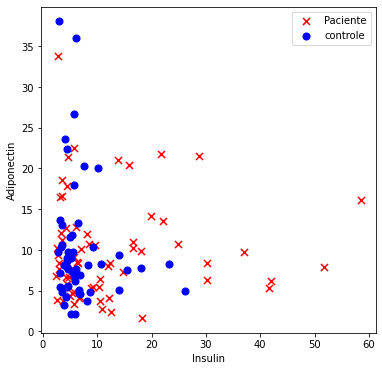

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['Insulin'], positivo['Adiponectin'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['Insulin'], negativo['Adiponectin'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('Insulin')
ax.set_ylabel('Adiponectin')

Abaixo, um gráfico relacionando a idade a resistencia a insulina.

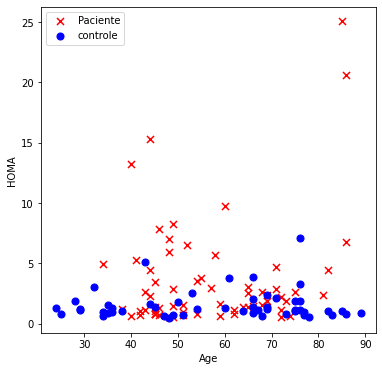

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['Age'], positivo['HOMA'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['Age'], negativo['HOMA'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('HOMA');

Abaixo, podemos observar que há um agrupamento de casos com o BMI entre 25 a 33, e a idade de 40 a 55 anos aproximadamente. Mas nada significativo.

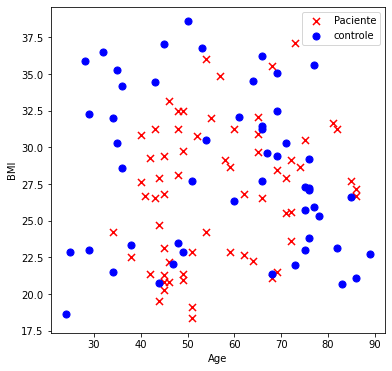

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positivo['Age'], positivo['BMI'], s=50, c='r', marker='x', label='Paciente')
ax.scatter(negativo['Age'], negativo['BMI'], s=50, c='b', marker='o', label='controle')
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('BMI');

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?



1.Sugere que Resistencia a Insulina em conjunto com a Resistina, a glicose e IMC, podem ser considerados um bom conjunto de candidatos a sinalizadores de câncer de mama para serem implementados em testes de triagem.
Observou-se que essas variaveis(resistencia a insulina, obesidade, diabetes) pode estar associada ao aumento do risco câncer de mama.
Apesar da importância de se conhecer os fatores envolvidos na etiologia do câncer de mama, visto que é um importante problema de Saúde Pública mundial, alguns deles ainda não estão bem elucidados. Vida saudável, juntamente com a oferta da prevenção secundária do câncer de mama, evitaria muitos adoecimentos e mortes decorrentes de diagnóstico tardio do câncer de mama.

2. Pré-obesidade e Obesidade são fatores de alerta de cancer de mama?
Resistencia a insulina, e problemas metabolicos são fatores de alerta isolados? Ou a associação aos demais fatores? 

3. Para as pessoas que eu solicitei que olhassem os gráficos, todos entenderam o contexto do projeto, os dados, e a visualização dos gráficos de forma clara. Visto esse feedback não haverá alterações.



Após o feedback, o que você mudaria?

A principio, ficou claro a visualização dos graficos, as pessoas compreenderam que se trata de um estudo de casos de cancer de mama com base em analises clinicas, e não obtive feedback para possiveis ajustes, entretanto, abaixo inclui uma sequencia de histograma, para visualização de cada variavel, separada por pacientes (vermelho) e controle(azul).


Apresente suas nova(s) visualização(ões) a partir do feedback:

In [ ]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO


In [ ]:
import plotly.express as px

#muitas colunas muitas linhas e muitos graficos, função de repetição FOR
for coluna in df:
    grafico = px.histogram(df, x=coluna, color='Classification')
    grafico.show()



Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

Com base na hipotese levantada acima, irei utilizar a variavel, HOMA, GLUCOSE, BMI e RESISTIN, para verificar se apenas elas identificar bem o diagnostico, e farei outro com todas as variaveis, comparar.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import statsmodels.api as sm


df.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP1            116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 10.0 KB


In [ ]:
X1 = df.drop(['Classification'], axis = 1)
y = np.array(df['Classification'], dtype = 'str')

In [ ]:
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2'],
      dtype='<U21')

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   Glucose      116 non-null    int64  
 3   Insulin      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   Leptin       116 non-null    float64
 6   Adiponectin  116 non-null    float64
 7   Resistin     116 non-null    float64
 8   MCP1         116 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 9.1 KB


In [ ]:
# tratando os dados
X = sm.add_constant(X1[['HOMA','Resistin','Glucose','BMI']])
y = np.array(y, dtype = 'int')
y[y == 1 ] = 0
y[y == 2 ] = 1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
model = sm.Logit(y,X, normalize=True)




In [ ]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.499387
         Iterations 7


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2739
Time:                        20:57:09   Log-Likelihood:                -57.929
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 7.374e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1181      2.121     -1.942      0.052      -8.275       0.039
HOMA           0.2768      0.166      1.667      0.095      -0.049       0.602
Resistin       0.0696      0.030      2.304      0.0

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO


In [ ]:

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metricas usadas para classificacao
from sklearn.metrics import confusion_matrix

In [ ]:
#O X utilizado na regressão logistica somente com as variaveis da hipotese mencionado no começo do trabalho.
X

,const,HOMA,Resistin,Glucose,BMI
0,1.0,0.467409,7.99585,70,23.500000
1,1.0,0.706897,4.06405,92,20.690495
2,1.0,1.009651,9.27715,91,23.124670
3,1.0,0.612725,12.76600,77,21.367521
4,1.0,0.805386,10.57635,92,21.111111
...,...,...,...,...,...
111,1.0,0.755688,10.96000,92,26.850000
112,1.0,1.117400,7.32000,100,26.840000
113,1.0,1.370998,10.33000,97,32.050000
114,1.0,0.570392,3.27000,82,25.590000


In [ ]:
#Verificar se a normalização do statsModels, ja não esta afetando essa linha de codigo.
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 10)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Coloque abaixo a matriz de confusão do modelo feito:

In [ ]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

matriz = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito Negativo[0]","Predito Positivo[1]"],
             index  =["Verdadeiro Negativo[0]", "Verdadeiro Positivo[1]"])
matriz

,Predito Negativo[0],Predito Positivo[1]
Verdadeiro Negativo[0],9,3
Verdadeiro Positivo[1],1,11


In [ ]:
from sklearn.metrics import classification_report

As métricas, eu havia feito o cálculo base, mas se acaso alterasse o valor na matrix de confusão, eu teria que alterar manualmente, podendo acusar erro, por sugestão dos colegas, usei a biblioteca acima, e a função abaixo para apresentar as métricas.

In [ ]:
#Com as variaveis referente a hipotese levantada com as variaveis HOMA, INSULIN, RESISTIN.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.79      0.92      0.85        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



In [ ]:
#Não consegui tirar da tabela acima os dados, preferi tirar a prova real.
acuracia = (11+9)/(11+9+3+1)
precisao = 11/(11+3)
especificidade = 9/(9+3)
sensitividade = 11/(11+1)


Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [ ]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {:.4f}'.format(acuracia))
print('precisão: {:.4f}'.format(precisao))
print('especificidade: {:.4f}'.format(especificidade))
print('sensitividade: {:.4f}'.format(sensitividade))

acurácia: 0.8333
precisão: 0.7857
especificidade: 0.7500
sensitividade: 0.9167


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?


Na hiposete apresentada, houve mais erros do tipo I, (variaveis HOMA, GLUCOSE, BMI E RESISTIN), o tipo I ele errou 3, colocou como pacientes(com cancer), sendo que eram controle(sem cancer), e no tipo II errou 1, colocando pacientes(com cancer) como controle (não tendo cancer). Neste caso é melhor errar no Falso Positivo (Tipo I) do que no tipo II, pois antes errar por precaução, do que deixar um paciente com cancer fora do grupo de tratamento por erro.


*Neste caso, como é um banco de dados relacionado a saúde, devemos reforçar que o diagnostico deverá ser feito por especialista, sendo o programa, apenas um sinalizador, e quanto mais atributos envolvidos, quanto mais informações mais apurado ficará a predição.*


Usando apenas quatro variaveis do banco de dados, ainda obtivemos um resultado com pouca diferença se tivermos utilizando todos os atributos do dataset (conforme apresento abaixo), então podemos dizer que a hipotese levantada ao inicio deste projeto, tem significancia no resultado obtido, mas não o suficiente para evitar erros.



# **Abaixo, apenas a nivel experimental o Statsmodels com TODAS AS VARIAVEIS SEM CONTANTE.**

In [ ]:
model_todas = sm.Logit(y,X1, normalize=True)
result_todas = model_todas.fit()


Optimization terminated successfully.
         Current function value: 0.493418
         Iterations 9


In [ ]:
print(result_todas.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2826
Time:                        20:57:09   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0284      0.015     -1.887      0.059      -0.058       0.001
BMI            -0.1767      0.065     -2.729      0.006      -0.304      -0.050
Glucose         0.0582      0.021      2.801    

usando a biblioteca sklearn 

In [ ]:
#Utilizei o X1 como principal neste modelo:
X1_std = StandardScaler().fit_transform(X1)
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X1_std, y, test_size = 0.2, random_state = 10)

In [ ]:
lrT = LogisticRegression(random_state=10)
lrT.fit(X_trainT, y_trainT)
y_predT = lrT.predict(X_testT)

In [ ]:
#Matriz de confusão da regressão logistica com todos os atributos.
matriz_todas = pd.DataFrame(confusion_matrix(y_testT, y_predT), 
                  columns=["Predito Negativo[0]","Predito Positivo[1]",],
                  index  =["Verdadeiro Negativo[0]", "Verdadeiro Positivo[1]"])
matriz_todas

,Predito Negativo[0],Predito Positivo[1]
Verdadeiro Negativo[0],10,2
Verdadeiro Positivo[1],2,10


In [ ]:
#Com todas as variaveis no X1.
print(classification_report(y_testT, y_predT))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24

